In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
import os
for dirname, _, filenames in os.walk('/content/Healthcare_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
train = pd.read_csv('/content/Healthcare_Data/train_data.csv')
test = pd.read_csv('/content/Healthcare_Data/test_data.csv')
dictionary = pd.read_csv('/content/Healthcare_Data/train_data_dictionary.csv')
sample = pd.read_csv('/content/Healthcare_Data/sample_sub.csv')

In [9]:
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


# **DATA** **EXPLORATION**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25082 entries, 0 to 25081
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            25082 non-null  int64  
 1   Hospital_code                      25082 non-null  int64  
 2   Hospital_type_code                 25082 non-null  object 
 3   City_Code_Hospital                 25082 non-null  int64  
 4   Hospital_region_code               25082 non-null  object 
 5   Available Extra Rooms in Hospital  25082 non-null  int64  
 6   Department                         25082 non-null  object 
 7   Ward_Type                          25082 non-null  object 
 8   Ward_Facility_Code                 25082 non-null  object 
 9   Bed Grade                          25078 non-null  float64
 10  patientid                          25081 non-null  float64
 11  City_Code_Patient                  24831 non-null  flo

In [11]:
train.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
25077,25078,21,c,3,Z,2,gynecology,S,A,3.0,12058.0,5.0,Emergency,Minor,2.0,11-20,5188.0,11-20
25078,25079,3,c,3,Z,5,gynecology,Q,A,3.0,12058.0,5.0,Emergency,Minor,4.0,11-20,4254.0,0-10
25079,25080,12,a,9,Y,4,gynecology,R,B,4.0,12058.0,5.0,Emergency,Minor,3.0,11-20,5577.0,11-20
25080,25081,15,c,5,Z,6,gynecology,P,F,4.0,12058.0,5.0,Urgent,Minor,4.0,11-20,4870.0,21-30
25081,25082,2,c,5,Z,5,gynecology,Q,F,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


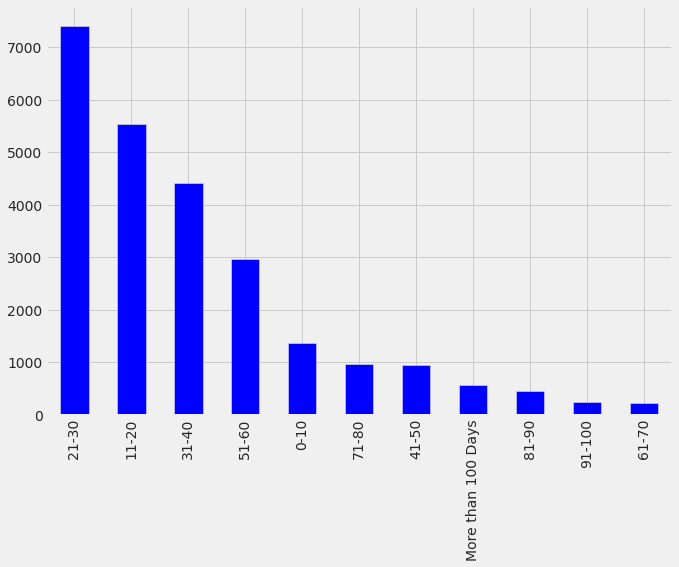

In [12]:
plt.figure(figsize=(10,7))
train.Stay.value_counts().plot(kind="bar", color = ['blue'])

In [13]:
train.isnull().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                              4
patientid                              1
City_Code_Patient                    251
Type of Admission                      1
Severity of Illness                    1
Visitors with Patient                  1
Age                                    1
Admission_Deposit                      1
Stay                                   1
dtype: int64

# **DATA PREPROCESSING**

In [59]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [60]:
# Combine test and train dataset for processing
new_set = [train, test]

In [61]:
from sklearn.preprocessing import LabelEncoder
for data in new_set:
    label = LabelEncoder()
    data['Department'] = label.fit_transform(data['Department'])

In [62]:
for dataset in new_set:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [63]:
new_set[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,Z,-0.091334,3,2,5,2.0,31397.0,7.0,0,0,-0.708524,5.0,-0.066519,0.0
1,2,2,2,5,Z,-0.967375,3,3,5,2.0,31397.0,7.0,1,0,-0.708524,5.0,0.923542,4.0
2,3,10,4,1,X,-0.967375,1,3,4,2.0,31397.0,7.0,1,0,-0.708524,5.0,-0.224093,3.0
3,4,26,1,2,Y,-0.967375,3,2,3,2.0,31397.0,7.0,1,0,-0.708524,5.0,2.174645,4.0
4,5,26,1,2,Y,-0.967375,3,3,3,2.0,31397.0,7.0,1,0,-0.708524,5.0,0.547642,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25076,25077,9,3,5,Z,2.536788,3,1,5,2.0,12058.0,5.0,0,1,0.426572,1.0,0.802039,1.0
25077,25078,21,2,3,Z,-0.967375,2,3,0,3.0,12058.0,5.0,0,1,-0.708524,1.0,0.196422,1.0
25078,25079,3,2,3,Z,1.660747,2,1,0,3.0,12058.0,5.0,0,1,0.426572,1.0,-0.690172,0.0
25079,25080,12,0,9,Y,0.784707,2,2,1,4.0,12058.0,5.0,0,1,-0.140976,1.0,0.565677,1.0


In [64]:
new_set[1]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,2,3,Z,-0.084325,2,3,0,2.0,17006,2.0,0,2,-0.736250,7,-1.774377
1,318440,29,0,4,X,-0.975775,2,3,5,2.0,17006,2.0,1,2,0.482722,7,-0.900745
2,318441,26,1,2,Y,-0.084325,2,1,3,4.0,17006,2.0,0,2,-0.126764,7,-0.452097
3,318442,6,0,6,X,-0.084325,2,1,5,2.0,17006,2.0,1,2,-0.126764,7,-0.754035
4,318443,28,1,11,X,-0.975775,2,2,5,2.0,17006,2.0,1,2,0.482722,7,-0.765393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,331733,1,3,10,Y,-0.975775,2,2,1,2.0,32945,23.0,0,2,-0.736250,6,0.443305
13295,331734,18,3,13,Y,1.698573,2,1,1,3.0,32945,23.0,1,2,2.920665,6,-0.817451
13296,331735,18,3,13,Y,-0.084325,1,1,1,3.0,32945,23.0,1,2,-0.126764,6,-1.089101
13297,331736,18,3,13,Y,0.807124,2,1,1,3.0,32945,23.0,2,2,2.920665,6,-0.234399


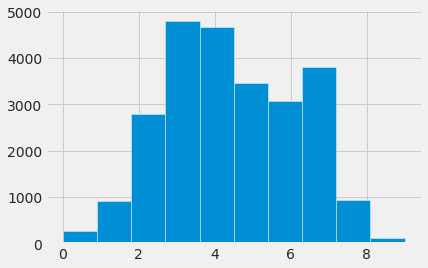

In [65]:
new_set[0].Age.hist()

In [66]:
new_set[0].Age.unique()

array([5., 7., 3., 4., 8., 6., 2., 1., 0., 9.])

In [67]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [68]:
for dataset in new_set:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

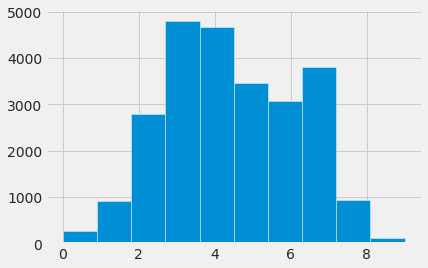

In [69]:
new_set[0].Age.hist()

In [70]:
new_set[0].Stay.unique()

array([ 0.,  4.,  3.,  1.,  5.,  2.,  7., 10.,  8.,  6.,  9.])

In [71]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

In [72]:
new_set[0]['Stay'] = new_set[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

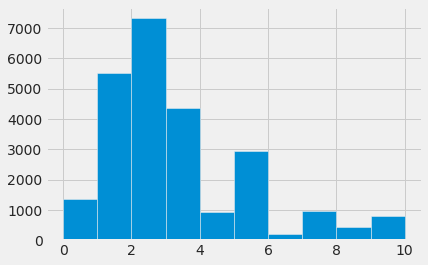

In [73]:
new_set[0].Stay.hist()

In [74]:
for data in new_set:
    print(data.shape)

(24827, 18)
(13190, 17)


In [75]:
new_set[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24827 entries, 0 to 25080
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            24827 non-null  int64  
 1   Hospital_code                      24827 non-null  int64  
 2   Hospital_type_code                 24827 non-null  int64  
 3   City_Code_Hospital                 24827 non-null  int64  
 4   Hospital_region_code               24827 non-null  object 
 5   Available Extra Rooms in Hospital  24827 non-null  float64
 6   Department                         24827 non-null  int64  
 7   Ward_Type                          24827 non-null  int64  
 8   Ward_Facility_Code                 24827 non-null  int64  
 9   Bed Grade                          24827 non-null  float64
 10  patientid                          24827 non-null  float64
 11  City_Code_Patient                  24827 non-null  flo

In [76]:
new_set[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13190 entries, 0 to 13298
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            13190 non-null  int64  
 1   Hospital_code                      13190 non-null  int64  
 2   Hospital_type_code                 13190 non-null  int64  
 3   City_Code_Hospital                 13190 non-null  int64  
 4   Hospital_region_code               13190 non-null  object 
 5   Available Extra Rooms in Hospital  13190 non-null  float64
 6   Department                         13190 non-null  int64  
 7   Ward_Type                          13190 non-null  int64  
 8   Ward_Facility_Code                 13190 non-null  int64  
 9   Bed Grade                          13190 non-null  float64
 10  patientid                          13190 non-null  int64  
 11  City_Code_Patient                  13190 non-null  flo

In [77]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']
len(columns_list)

4

In [78]:
from sklearn.preprocessing import StandardScaler
s1= StandardScaler()

for dataset in new_set:
    dataset[columns_list]= s1.fit_transform(dataset[columns_list].values)

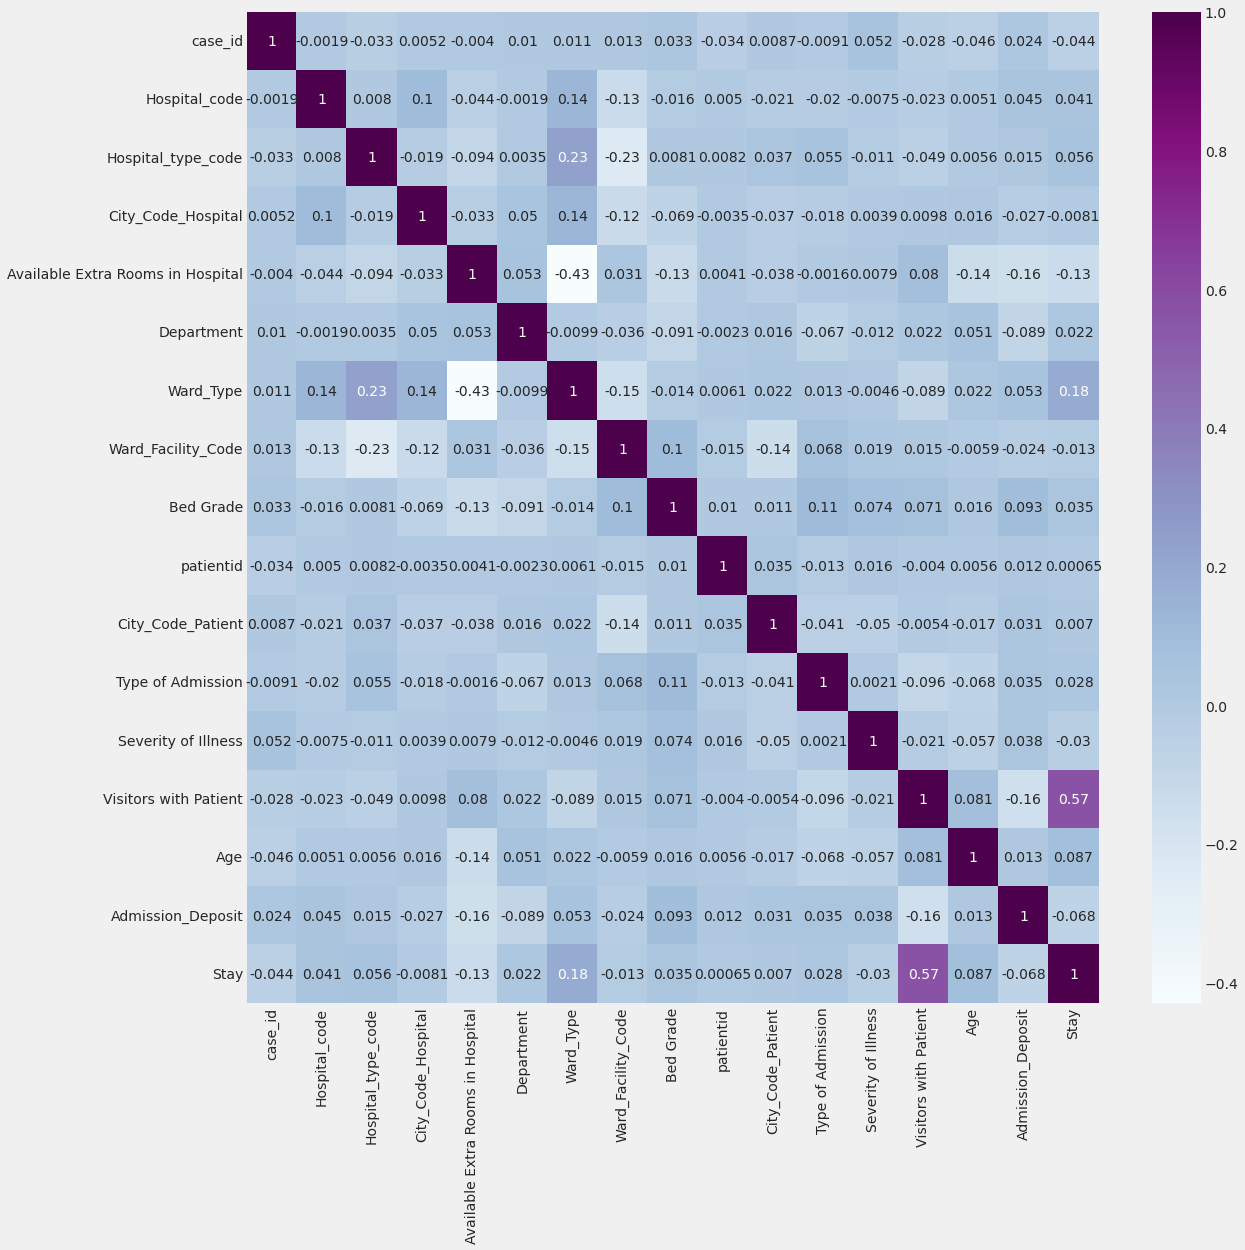

In [79]:
plt.figure(figsize=(17,17))
sns.heatmap(new_set[0].corr(), annot=True, cmap='BuPu')

# **MODELLING THE DATA**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [81]:
train = new_set[0]
test = new_set[1]

In [82]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [89]:
X_train = train.drop(['case_id', 'Stay','Hospital_region_code'], axis=1)
Y_train = train["Stay"]
X_test  = test.drop(['case_id','Hospital_region_code'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((24827, 15), (24827,), (13190, 15))

In [90]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)
X_test = X_test.astype(int)

In [91]:
sample.shape

(137057, 2)

In [92]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient',
       'Type of Admission', 'Severity of Illness', 'Visitors with Patient',
       'Age', 'Admission_Deposit'],
      dtype='object')

In [93]:
Y_train

0        0
1        4
2        3
3        4
4        4
        ..
25076    1
25077    1
25078    0
25079    1
25080    2
Name: Stay, Length: 24827, dtype: int64

In [98]:
# Accuracy while using KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy of KNN ")
knn_accuracy

Accuracy of KNN 


56.52

In [99]:
# Accuracy while using Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy of Decision Tree ")
decision_tree_accuracy

Accuracy of Decision Tree 


99.39

In [100]:
# Accuracy which using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy of Random Forest ")
acc_random_forest

Accuracy of Random Forest 


99.39

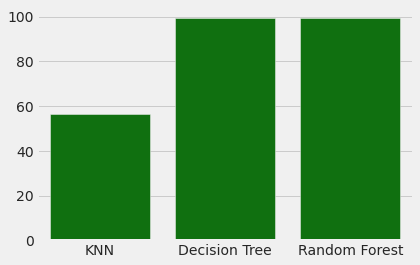

In [106]:
sns.barplot(x= ['KNN','Decision Tree','Random Forest'],y= [knn_accuracy, decision_tree_accuracy, acc_random_forest],color = 'green')

# **RESULT**

In [107]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [109]:
LOS_predicted = pd.DataFrame({
        "case_id": test["case_id"],
        "Stay": Y_pred
})

In [110]:
LOS_predicted['Stay'] = LOS_predicted['Stay'].replace(stay_dict.values(), stay_dict.keys())

In [111]:
LOS_predicted.to_csv('LOS.csv', index = False)

In [115]:
LOS = pd.read_csv('/content/LOS.csv')
LOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13190 entries, 0 to 13189
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   case_id  13190 non-null  int64 
 1   Stay     13190 non-null  object
dtypes: int64(1), object(1)
memory usage: 206.2+ KB


In [116]:
LOS.head(10)

,case_id,Stay
0,318439,11-20
1,318440,11-20
2,318441,21-30
3,318442,21-30
4,318443,21-30
5,318444,21-30
6,318445,21-30
7,318453,31-40
8,318454,0-10
9,318455,31-40
